<a href="https://colab.research.google.com/github/eftychiav/pattern_recognition/blob/main/hw2_patternrec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


csv_file = "Data_exercise1.csv"

with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    data_array = np.array(data, dtype=float)

# print(data_array)

data_c1 = data_array[data_array[:, 2] == 1][:, :2]  # Extracting only the features
data_c2 = data_array[data_array[:, 2] == 2][:, :2]
data_c3 = data_array[data_array[:, 2] == 3][:, :2]


In [ ]:
def parzen_window(u, h):
  return (1 / (h * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (u **2) / h**2)

def density_estimation(X, x, h, kernel_function = parzen_window):
  n = X.shape[0]
  V_n = h**2
  distances = np.linalg.norm((X - x) / h, axis=1)
  kernel_values = kernel_function(distances, h)
  density = (1 / n * h ** 2) * np.sum(kernel_values)
  return density

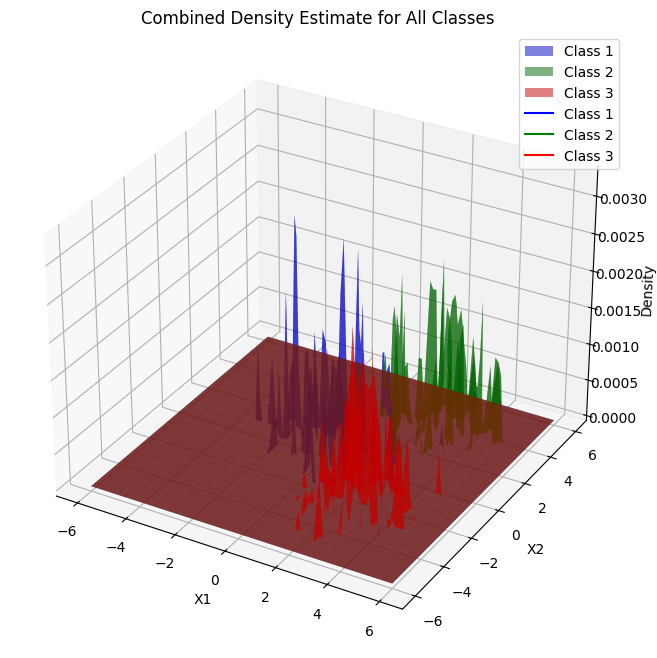

In [ ]:
x1 = np.linspace(-6, 6, 100)
x2 = np.linspace(-6, 6, 100)
X1, X2 = np.meshgrid(x1, x2)
grid_points = np.column_stack([X1.ravel(), X2.ravel()])

h = 0.3

# Estimate densities for each class on the grid
density_c1 = np.array([density_estimation(data_c1, point, h) for point in grid_points])
density_c2 = np.array([density_estimation(data_c2, point, h) for point in grid_points])
density_c3 = np.array([density_estimation(data_c3, point, h) for point in grid_points])

# Reshape densities to match the grid for plotting
density_c1 = density_c1.reshape(X1.shape)
density_c2 = density_c2.reshape(X1.shape)
density_c3 = density_c3.reshape(X1.shape)

# Plot combined density estimates for each class in a single 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot density for each class with different colors
ax.plot_surface(X1, X2, density_c1, color='blue', alpha=0.5, rstride=5, cstride=5, label="Class 1")
ax.plot_surface(X1, X2, density_c2, color='green', alpha=0.5, rstride=5, cstride=5, label="Class 2")
ax.plot_surface(X1, X2, density_c3, color='red', alpha=0.5, rstride=5, cstride=5, label="Class 3")

# Customize plot labels and title
ax.set_title("Combined Density Estimate for All Classes")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Density")

# Create a legend manually
legend_labels = ["Class 1", "Class 2", "Class 3"]
legend_colors = ["blue", "green", "red"]
for color, label in zip(legend_colors, legend_labels):
    ax.plot([], [], color=color, label=label)
ax.legend()

plt.show()

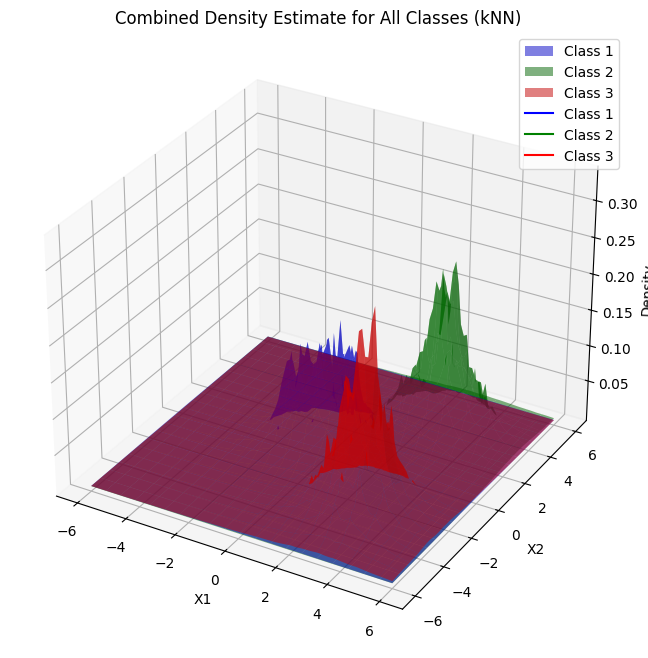

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance
from scipy.special import gamma


# Define kNN-based density estimation function
def knn_density_estimation(X, x, k):
    """
    Estimates the density at point x using k-Nearest Neighbors.
    X: Samples from the class
    x: Point at which to estimate the density
    k: Number of nearest neighbors to use
    """
    # Find distances from x to all points in X
    distances = np.linalg.norm(X - x, axis=1)

    # Sort distances and get the k-th nearest distance
    sorted_distances = np.sort(distances)
    d_k = sorted_distances[k - 1]  # Distance to k-th nearest neighbor

    # Volume of the hypersphere in 2D (pi * r^2)
    V_k = np.pi * (d_k ** 2)

    # Density estimate
    density = k / (X.shape[0] * V_k)
    return density

# Define the grid of points (x1, x2)
x1 = np.linspace(-6, 6, 100)
x2 = np.linspace(-6, 6, 100)
X1, X2 = np.meshgrid(x1, x2)
grid_points = np.column_stack([X1.ravel(), X2.ravel()])

# Number of neighbors for kNN
k = 10

# Estimate densities for each class on the grid
density_c1 = np.array([knn_density_estimation(data_c1, point, k) for point in grid_points])
density_c2 = np.array([knn_density_estimation(data_c2, point, k) for point in grid_points])
density_c3 = np.array([knn_density_estimation(data_c3, point, k) for point in grid_points])

# Reshape densities to match the grid for plotting
density_c1 = density_c1.reshape(X1.shape)
density_c2 = density_c2.reshape(X1.shape)
density_c3 = density_c3.reshape(X1.shape)

# Plot combined density estimates for each class in a single 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot density for each class with different colors
ax.plot_surface(X1, X2, density_c1, color='blue', alpha=0.5, rstride=5, cstride=5, label="Class 1")
ax.plot_surface(X1, X2, density_c2, color='green', alpha=0.5, rstride=5, cstride=5, label="Class 2")
ax.plot_surface(X1, X2, density_c3, color='red', alpha=0.5, rstride=5, cstride=5, label="Class 3")

# Customize plot labels and title
ax.set_title("Combined Density Estimate for All Classes (kNN)")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Density")

# Create a legend manually
legend_labels = ["Class 1", "Class 2", "Class 3"]
legend_colors = ["blue", "green", "red"]
for color, label in zip(legend_colors, legend_labels):
    ax.plot([], [], color=color, label=label)
ax.legend()

plt.show()

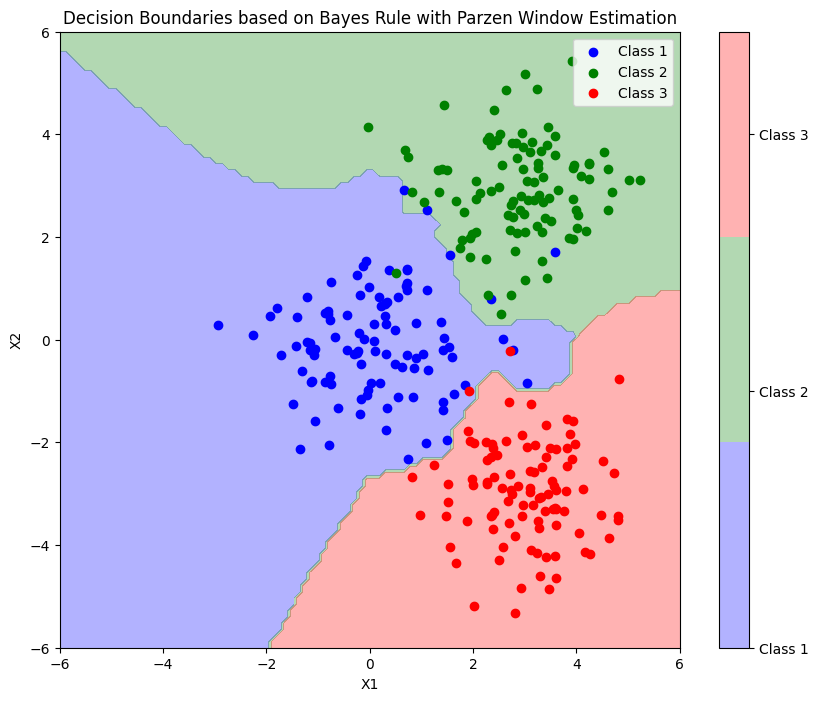

In [ ]:
from scipy.stats import norm

# Define the grid of points (x1, x2)
x1 = np.linspace(-6, 6, 100)
x2 = np.linspace(-6, 6, 100)
X1, X2 = np.meshgrid(x1, x2)
grid_points = np.column_stack([X1.ravel(), X2.ravel()])

# Bandwidth for Parzen window
h = 0.5

# Prior probabilities for each class (assuming equal priors here)
P_w1 = P_w2 = P_w3 = 1/3

# Calculate class-conditional densities for each class on the grid
density_c1 = np.array([density_estimation(data_c1, point, h) for point in grid_points])
density_c2 = np.array([density_estimation(data_c2, point, h) for point in grid_points])
density_c3 = np.array([density_estimation(data_c3, point, h) for point in grid_points])

# Compute total density p(x) using all classes
p_x = density_c1 * P_w1 + density_c2 * P_w2 + density_c3 * P_w3

# Calculate posterior probabilities P(ω|x) for each class on the grid
posterior_c1 = (density_c1 * P_w1) / p_x
posterior_c2 = (density_c2 * P_w2) / p_x
posterior_c3 = (density_c3 * P_w3) / p_x

# Determine decision regions by finding the class with the maximum posterior
decision_map = np.argmax(np.stack([posterior_c1, posterior_c2, posterior_c3], axis=1), axis=1)
decision_map = decision_map.reshape(X1.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, decision_map, levels=2, alpha=0.3, colors=["blue", "green", "red"])
colorbar = plt.colorbar(ticks=[0, 1, 2])
colorbar.set_ticklabels(["Class 1", "Class 2", "Class 3"])
plt.title("Decision Boundaries based on Bayes Rule with Parzen Window Estimation")

# Scatter plot of original data points for reference
plt.scatter(data_c1[:, 0], data_c1[:, 1], color='blue', label="Class 1")
plt.scatter(data_c2[:, 0], data_c2[:, 1], color='green', label="Class 2")
plt.scatter(data_c3[:, 0], data_c3[:, 1], color='red', label="Class 3")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()